In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Drive E\FSDS AND AI\Date wise files\16102024\16th - KNN\projects\KNN\brest cancer.txt',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.shape

(699, 11)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
col_names=['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
          'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns=col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
# drop Id column from dataset
df.drop('Id',axis=1,inplace=True)

In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [11]:
df['Bare_Nuclei']=pd.to_numeric(df['Bare_Nuclei'],errors='coerce')

In [12]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [13]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
# check frequency distribution of `Bare_Nuclei` column
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [15]:
# check unique values in `Bare_Nuclei` column
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [16]:
# check for nan values in `Bare_Nuclei` column
df['Bare_Nuclei'].isna().sum()

16

In [17]:
# view frequency distribution of values in `Class` variable
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [18]:
# view percentage of frequency distribution of values in `Class` variable
df['Class'].value_counts()/np.float_(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [19]:
# view summary statistics in numerical variables
round(df.describe(),2)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


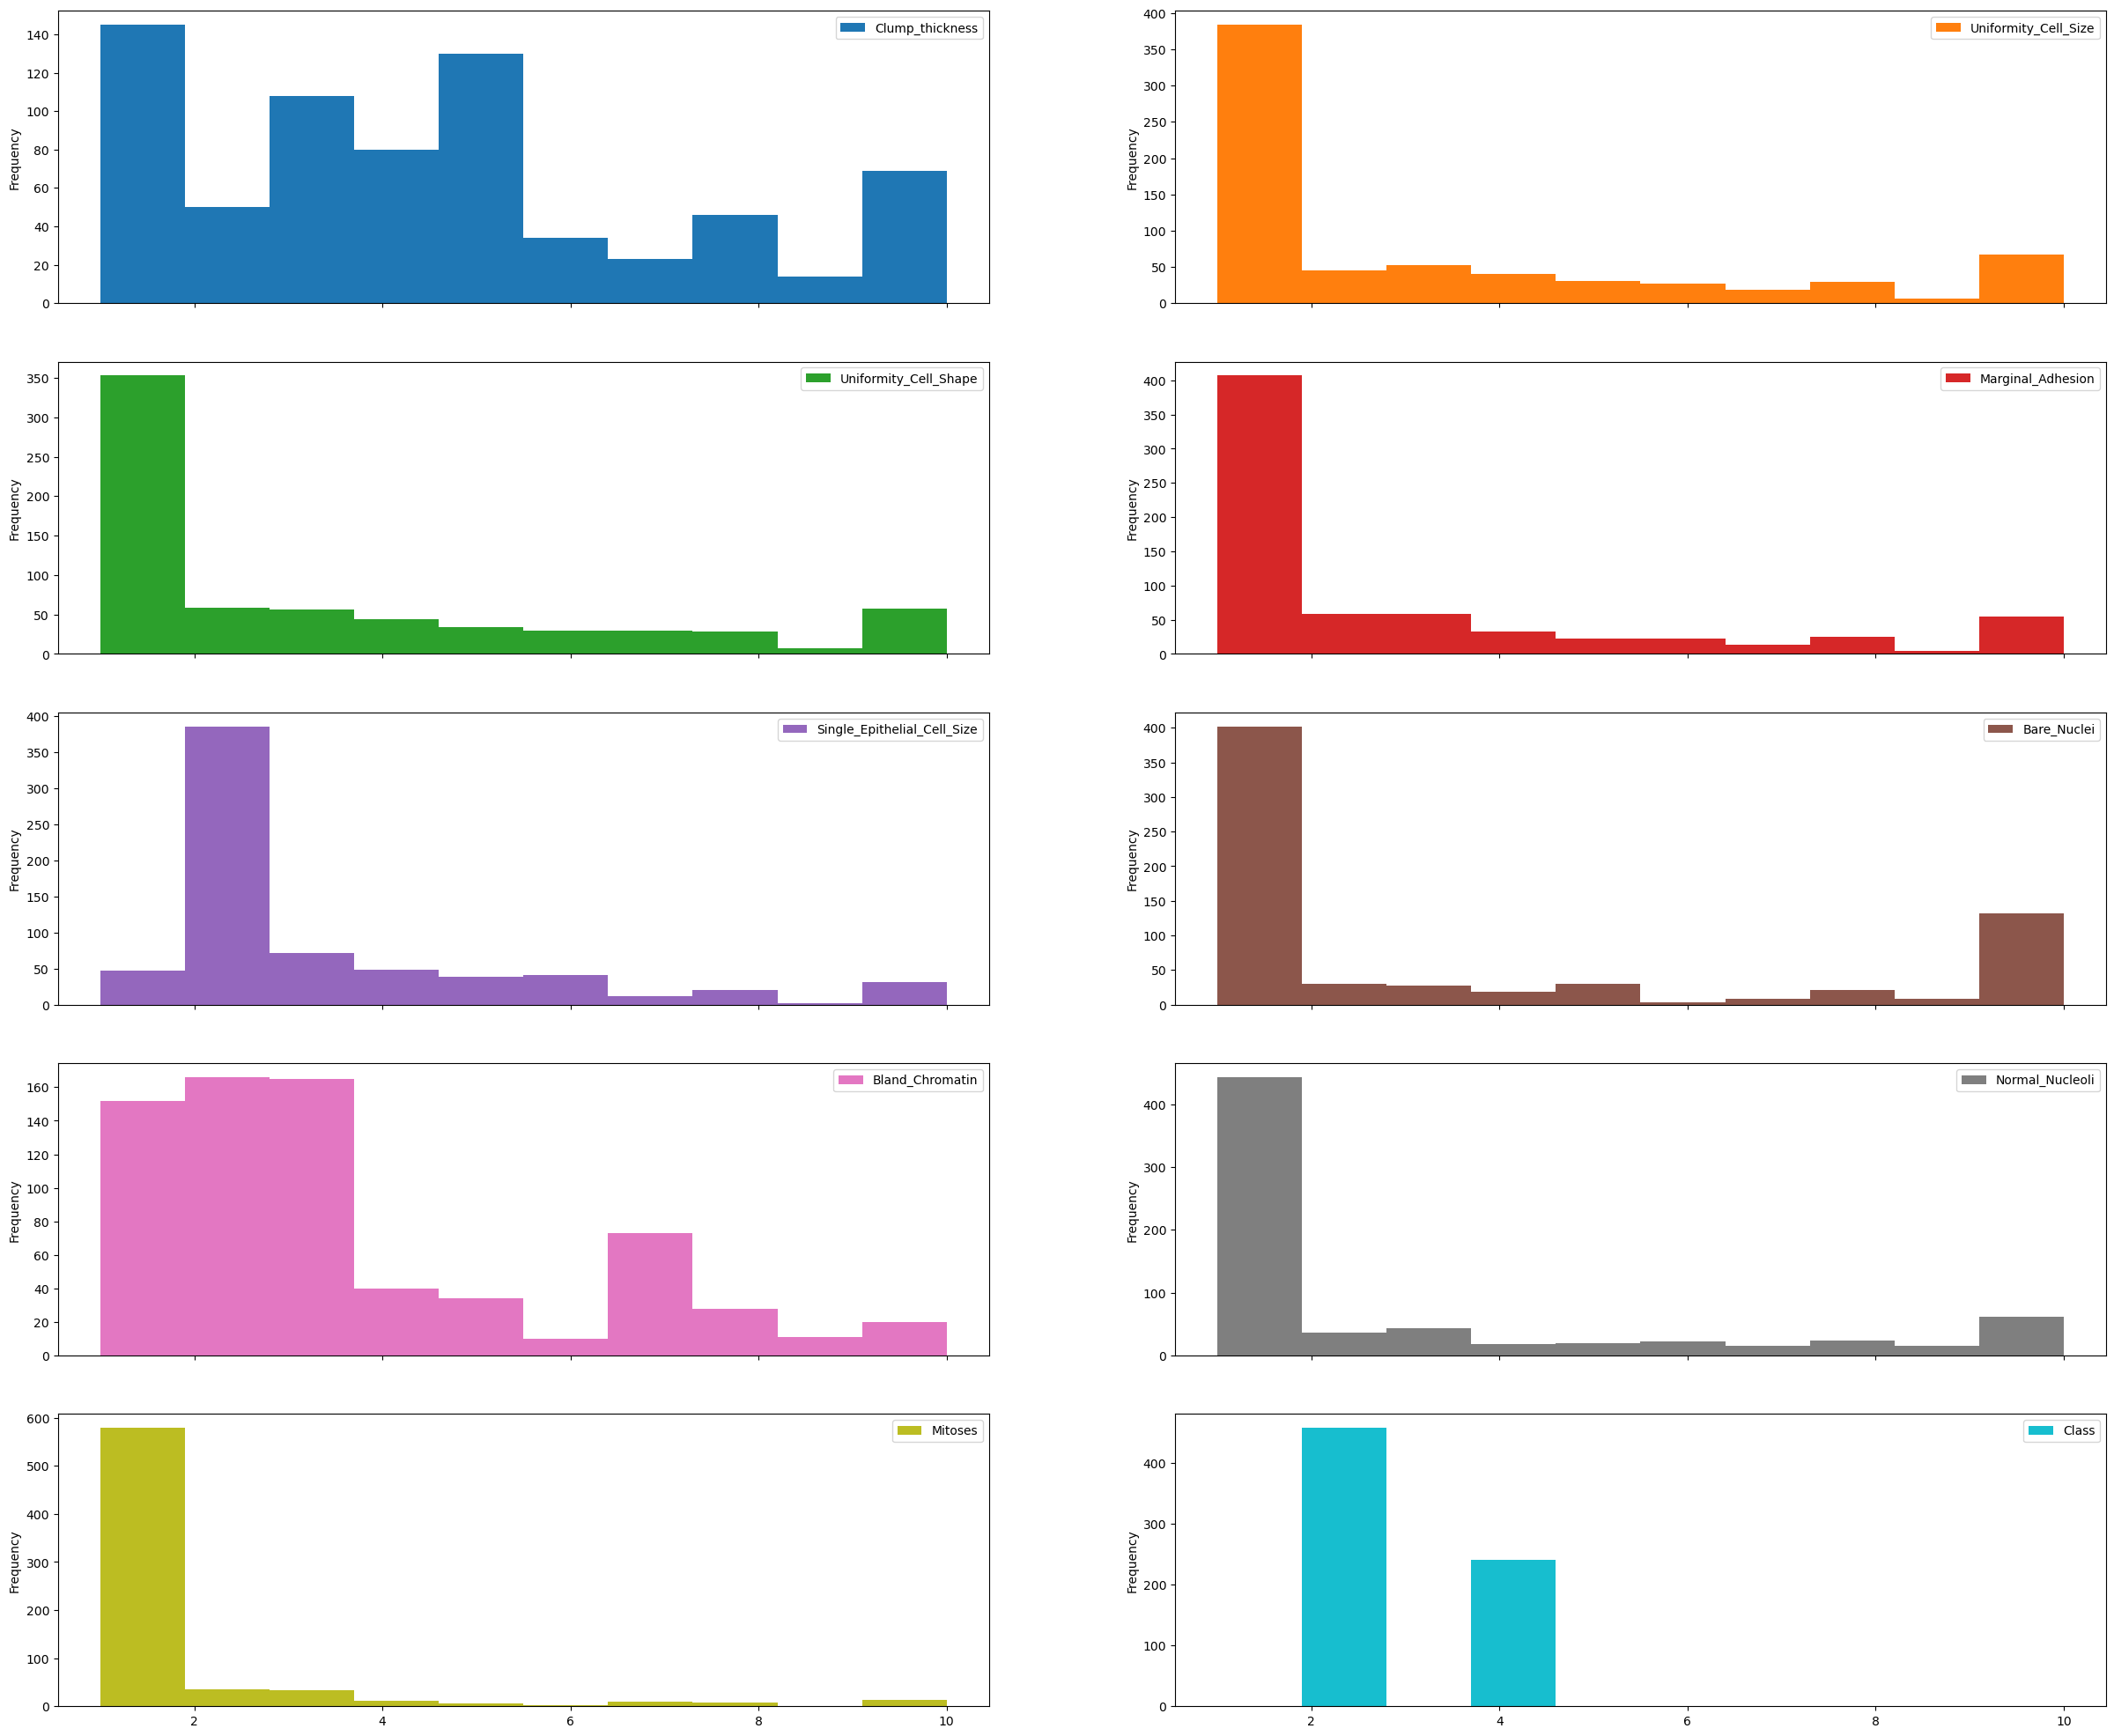

In [20]:
# plot histograms of the variables
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist',bins=10,subplots=True,layout=(5,2))
plt.show()

In [21]:
correlation=df.corr()

In [22]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

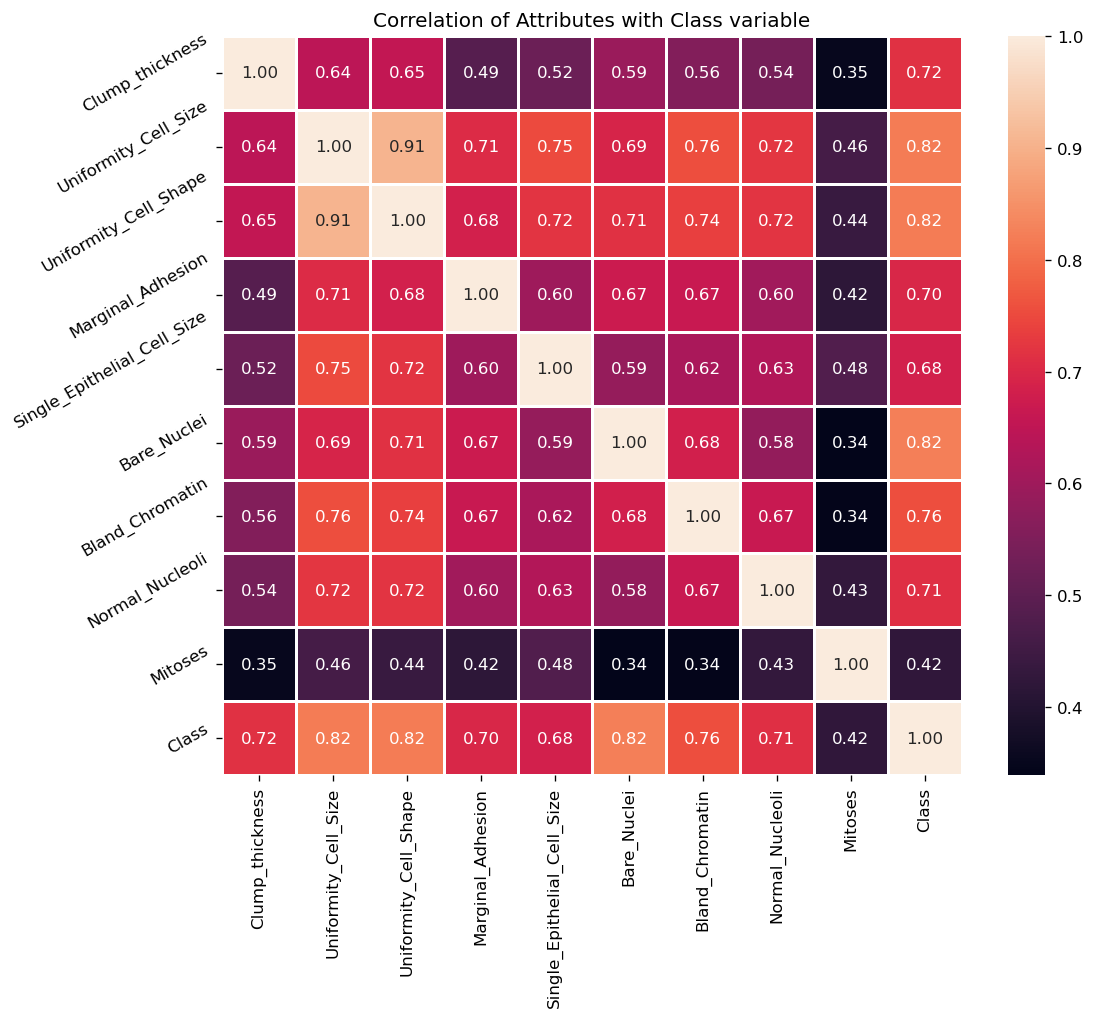

In [23]:
plt.figure(figsize=(10,8),dpi=120)
a=sns.heatmap(correlation,square=True,annot=True,fmt='0.2f',linecolor='white',linewidths=0.8)
a.set_title('Correlation of Attributes with Class variable')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()


In [24]:
X=df.drop(['Class'],axis=1)
y=df['Class']

In [25]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
# check the shape of X_train and X_test
X_train.shape,X_test.shape

((559, 9), (140, 9))

In [27]:
# check data types in X_train
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [28]:
# check missing values in numerical variables in X_train
X_train.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [29]:
# check missing values in numerical variables in X_test
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [30]:
# print percentage of missing values in the numerical variables in training set
for col in X_train.columns:
    if X_train[col].isna().mean()>0:
        print(col,round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


In [31]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train,X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median,inplace=True)

In [32]:
# check again missing values in numerical variables in X_train
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [33]:
# check missing values in numerical variables in X_test
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [35]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


In [36]:
cols=X_train.columns

In [37]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [38]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

In [39]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [40]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406


In [41]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred=knn.predict(X_test)

In [43]:
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [44]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [45]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [46]:
from sklearn.metrics import accuracy_score

ac=accuracy_score(y_test,y_pred)
print('Model accuracy score: {0:0.4f}'.format(ac))

Model accuracy score: 0.9714


In [47]:
y_pred_train=knn.predict(X_train)

accuracy=accuracy_score(y_train,y_pred_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy))

Training-set accuracy score: 0.9821


In [48]:
# print the scores on training and test set
print('Training set score: {0:0.4f}'.format(knn.score(X_train,y_train)))
print('Test set score: {0:0.4f}'.format(knn.score(X_test,y_test)))

Training set score: 0.9821
Test set score: 0.9714


In [49]:
# check class distribution in test set
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [50]:
# check null accuracy score
nullaccuracy=(85/(85+55))

In [51]:
print('Null accuracy score:{0:0.4f}'.format(nullaccuracy))

Null accuracy score:0.6071


In [52]:
# instantiate the model with k=5
knn_cla_5=KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn_cla_5.fit(X_train,y_train)

# predict on the test-set
y_pred_5=knn_cla_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'.format(accuracy_score(y_test,y_pred_5)))

Model accuracy score with k=5 : 0.9714


In [53]:
# instantiate the model with k=6
knn_cla_6=KNeighborsClassifier(n_neighbors=6)

# fit the model to the training set
knn_cla_6.fit(X_train,y_train)

# predict on the test-set
y_pred_6=knn_cla_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'.format(accuracy_score(y_test,y_pred_6)))

Model accuracy score with k=6 : 0.9786


In [54]:
# instantiate the model with k=7
knn_cal_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_cal_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_cal_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


In [55]:
# instantiate the model with k=8
knn_cla_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_cla_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_cla_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


In [56]:
# instantiate the model with k=9
knn_cla_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_cla_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_cla_9.predict(X_test)


print('Model accuracy score with k=9 is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 is: 0.9714


In [57]:
# Print the Confusion Matrix with k =3 and slice it into four pieces
from sklearn.metrics import confusion_matrix

con_matrix=confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n',con_matrix)

print('\nTrue Positives(TP) = ',con_matrix[0,0])
print('\nTrue Negatives(TN) = ',con_matrix[1,1])
print('\nFalse Positives(FP) = ',con_matrix[0,1])
print('\nFalse Negatives(FN) = ',con_matrix[1,0])


Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [58]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

con_matrix_7=confusion_matrix(y_test,y_pred_7)

print('Confusion matrix\n\n',con_matrix_7)

print('\nTrue Positives(TP) = ',con_matrix_7[0,0])
print('\nTrue Negatives(TN) = ',con_matrix_7[1,1])
print('\nFalse Positives(FP) = ',con_matrix_7[0,1])
print('\nFalse Negatives(FN) = ',con_matrix_7[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


<Axes: >

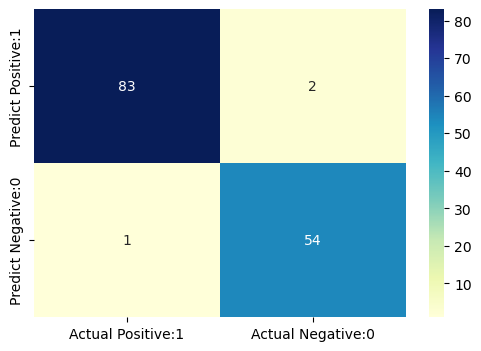

In [59]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

conf_matrix = pd.DataFrame(data=con_matrix_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [60]:
from sklearn.metrics import classification_report

class_report=classification_report(y_test,y_pred_7)

print(class_report)

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [61]:
TP=con_matrix_7[0,0]
TN=con_matrix_7[1,1]
FP=con_matrix_7[0,1]
FN=con_matrix_7[1,0]

In [62]:
# print classification accuracy
classification_accuracy=(TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy is : {0:0.4f}'.format(classification_accuracy))

Classification accuracy is : 0.9786


In [63]:
# print classification error

classification_error=(FP + FN) / float(TP + TN + FP + FN)

print('Classification error is: {0:0.4f}'.format(classification_error))

Classification error is: 0.0214


In [64]:
# print precision score
precision = TP / float(TP + FP)

print('Precision is: {0:0.4f}'.format(precision))

Precision is: 0.9765


In [65]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity is: {0:0.4f}'.format(recall))

Recall or Sensitivity is: 0.9881


In [66]:
true_pos_rate=TP / float(TP + FN)

print('True Positive Rate is: {0:0.4f}'.format(true_pos_rate))

True Positive Rate is: 0.9881


In [67]:
false_pos_rate=FP / float(FP + TN)

print('False Positive Rate is: {0:0.4f}'.format(false_pos_rate))

False Positive Rate is: 0.0357


In [68]:
specificity = TN / (TN + FP)

print('Specificity is: {0:0.4f}'.format(specificity))

Specificity is: 0.9643


In [69]:
# print the first 10 predicted probabilities of two classes- 2 and 4
y_pred_proba=knn.predict_proba(X_test)[0:10]

In [70]:
y_pred_proba

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [71]:
# store the probabilities in dataframe
y_pred_proba_dframe=pd.DataFrame(y_pred_proba,columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

In [72]:
y_pred_proba_dframe

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [73]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer
knn.predict_proba(X_test)[0:10,1]


array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333])

In [74]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_4=knn.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

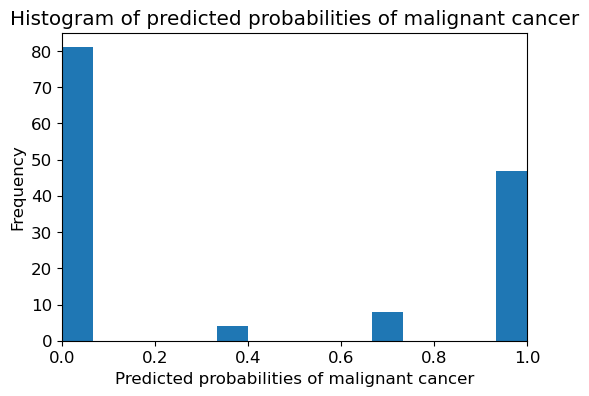

In [151]:
# plot histogram of predicted probabilities
plt.figure(figsize=(6,4))
plt.rcParams['font.size']=12

plt.hist(y_pred_4,bins=15)
plt.title('Histogram of predicted probabilities of malignant cancer')

plt.xlim(0,1)

plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')



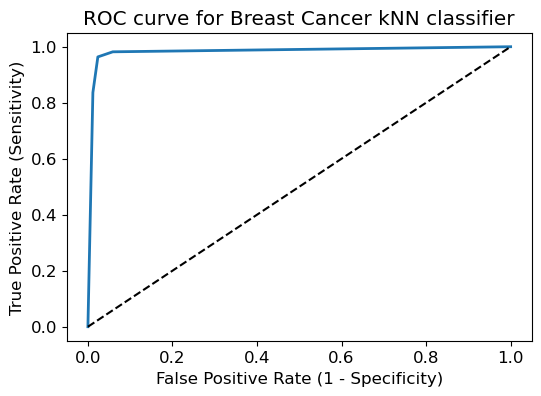

In [155]:
# plot ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred_4,pos_label=4)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')

plt.rcParams['font.size']=12

plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [157]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score

roc_score=roc_auc_score(y_test,y_pred_4)

print('ROC AUC is: {:.4f}'.format(roc_score))

ROC AUC is: 0.9825


In [159]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score

cross_valid_ROCAUC_score=cross_val_score(knn_cal_7,X_train,y_train,cv=5,scoring='roc_auc').mean()

print('Cross validated ROC AUC : {0:0.4f}'.format(cross_valid_ROCAUC_score))


Cross validated ROC AUC : 0.9910


In [161]:
# Applying 10-Fold Cross Validation

cross_valid_score_10=cross_val_score(knn_cal_7,X_train,y_train,cv=10,scoring='accuracy')

print('Cross-validation scores: {}'.format(cross_valid_score_10))

Cross-validation scores: [0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [163]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cross_valid_score_10.mean()))

Average cross-validation score: 0.9643
